# Exploring Student Data

There are some important tasks with looking for answering questions below:
- How are students performing in their math classes?
- What do students’ parents do for work?
- How often are students absent from school?

Data citation:

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. http://archive.ics.uci.edu/ml/datasets/Student+Performance

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez

In [22]:
# load libraries and setting options
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [23]:
# import data 
students = pd.read_csv('student-por.csv', sep=';', encoding='utf-8')

In [24]:
# Print first few rows of data
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [25]:
students.shape

(649, 33)

In [26]:
# print out summary statistics for all features in the dataset
students.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649,649,649.000000,649,649,649,649.000000,649.000000,649,649,649,649,649.000000,649.000000,649.000000,649,649,649,649,649,649,649,649,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,no,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,423,383,NaN,452,457,569,NaN,NaN,258,367,285,455,NaN,NaN,NaN,581,398,610,334,521,580,498,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.744222,NaN,NaN,NaN,2.514638,2.306626,NaN,NaN,NaN,NaN,1.568567,1.930663,0.221880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,NaN,NaN,1.218138,NaN,NaN,NaN,1.134552,1.099931,NaN,NaN,NaN,NaN,0.748660,0.829510,0.593235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000


#### Summarize a typical student grade

In [27]:
# Calculate and print the mean value of G3_grade
mean_G3 = students['G3'].mean()
print(f"The mean value of G3_grade is: {mean_G3:.2f}")

The mean value of G3_grade is: 11.91


In [28]:
# Calculate and print the median value of G3_grade
median_G3 = students['G3'].median()
print(f"The median value of G3_grade is: {median_G3:.2f}")

The median value of G3_grade is: 12.00


In [29]:
# Calculate and print the mode value of G3_grade
mode_G3 = students['G3'].mode().iloc[0]
print(f"The mode value of G3_grade is: {mode_G3:.2f}")

The mode value of G3_grade is: 11.00


#### Summarize the spread of student grades

In [ ]:
# Calculate and print the range of G3_grade
range_G3 = students['G3'].max() - students['G3'].min()
print(f"The range of G3_grade is: {range_G3:.2f}")

The range of G3_grade is: 19.00


In [16]:
# Calculate and print the standard deviation of G3_grade
std_G3 = students['G3'].std()
print(f"The standart deviation of G3_grade is: {std_G3:.2f}")

The standart deviation of G3_grade is: 3.23


About two thirds of students are earning a grade G3 between 8.68 (calculated as 11.91-3.23) and 15.14 (calculated as 11.91+3.23)

In [21]:
# Calculate and print the mean absolute deviation of G3_grade
mad_G3 = (students['G3'] - students['G3'].mean()).abs().mean()
print(f"The mean absolute deviation of G3_grade is: {mad_G3:.2f}")

The mean absolute deviation of G3_grade is: 2.41


#### Visualize the distribution of student grades

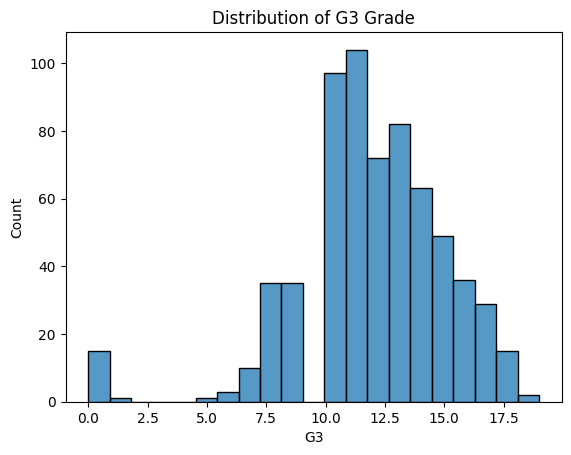

In [32]:
# create a histogram of math_grade
sns.histplot(data=students, x='G3')
plt.title('Distribution of G3 Grade')
plt.show()
plt.close()

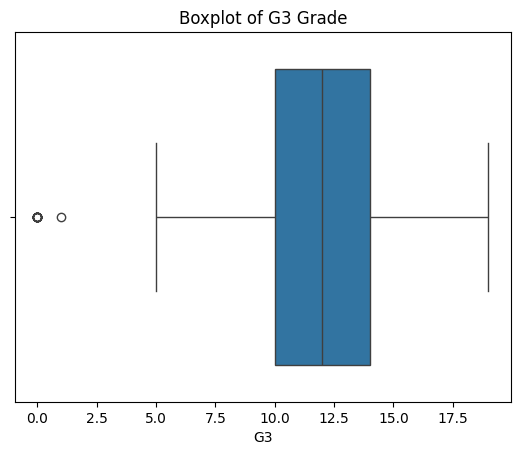

In [34]:
# create a boxplot of math_grade
sns.boxplot(data=students, x='G3')
plt.title('Boxplot of G3 Grade')
plt.show()
plt.close()

#### Summarize mothers' jobs

In [37]:
# printing the number of students who have mothers with each job type
mjob_counts = students['Mjob'].value_counts()
print(f"Number of students with mothers in each job type:")
mjob_counts

Number of students with mothers in each job type:


Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: count, dtype: int64

In [39]:
# calculate and print the proportion of students who have mothers with each job type
mjob_prop = round(students['Mjob'].value_counts(normalize=True), 2) * 100
print(f"Proportion of students with mothers in each job type:")
mjob_prop

Proportion of students with mothers in each job type:


Mjob
other       40.0
services    21.0
at_home     21.0
teacher     11.0
health       7.0
Name: proportion, dtype: float64

#### Visualize the distribution of mothers' jobs

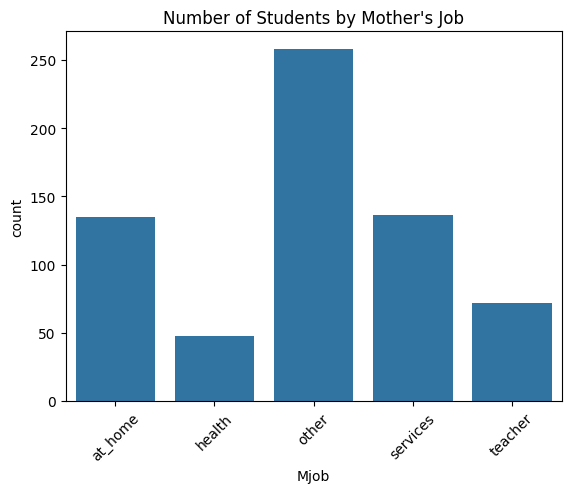

In [40]:
# create a bar chart of the Mjob variable
sns.countplot(data=students, x='Mjob')
plt.title('Number of Students by Mother\'s Job')
plt.xticks(rotation=45)
plt.show()
plt.close()

<Axes: ylabel='count'>

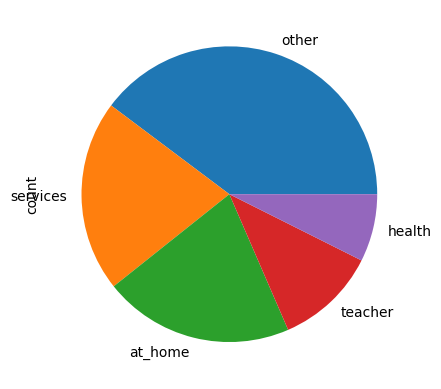

In [41]:
# Create a pie chart of the Mjob
mjob_counts.plot.pie()